In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv('./data/constituents-financials-cleaned.csv')

df.head()


np.float64(0.108500004)

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns  




Text(0.5, 1.0, 'Top 20 Companies by Market Cap')

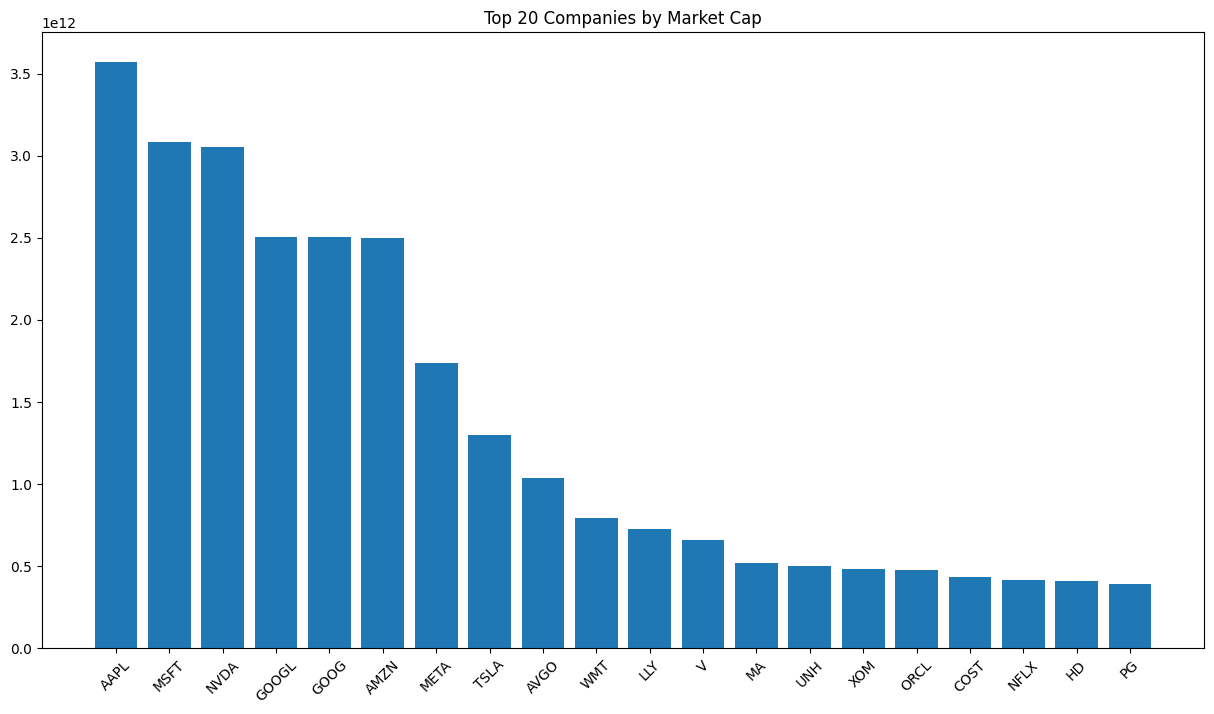

In [33]:
# Top 20 companies by market cap
top_20 = df.nlargest(20, 'Market Cap')
plt.figure(figsize=(15, 8))
plt.bar(top_20['Symbol'], top_20['Market Cap'])
plt.xticks(rotation=45)
plt.title('Top 20 Companies by Market Cap')

Text(0.5, 1.0, 'P/E Ratio Box Plot')

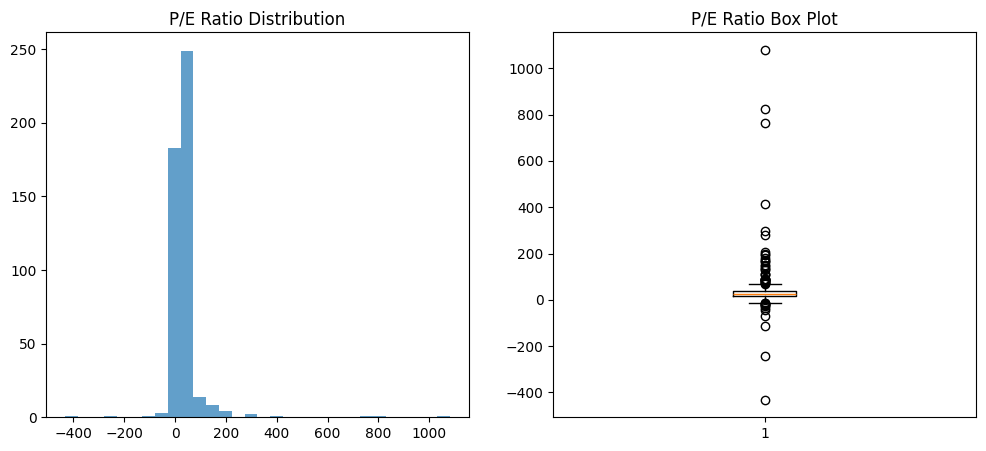

In [35]:
# P/E ratio distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Price/Earnings'], bins=30, alpha=0.7)
plt.title('P/E Ratio Distribution')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price/Earnings'])
plt.title('P/E Ratio Box Plot')

Text(0.5, 1.0, 'Dividend Yield Distribution by Sector')

<Figure size 1200x600 with 0 Axes>

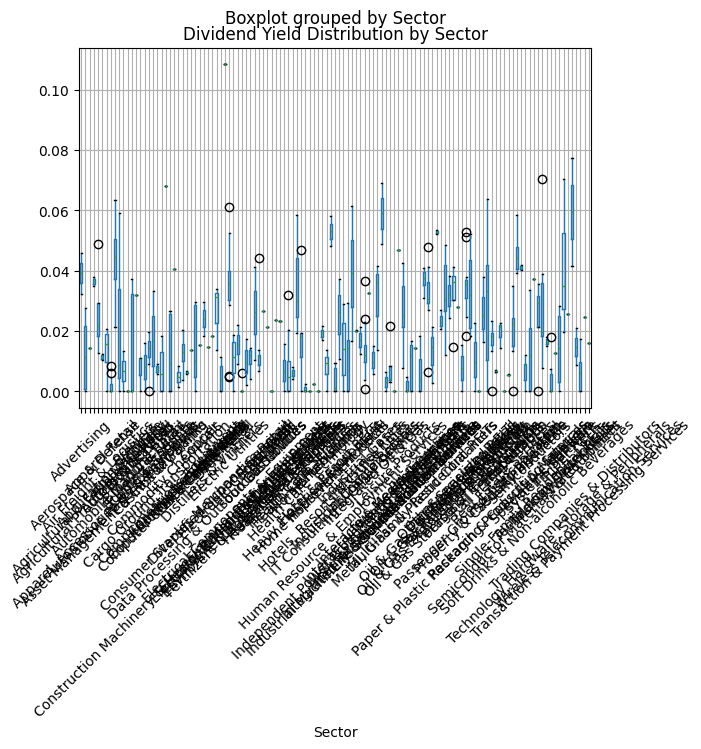

In [36]:
# Dividend yield by sector
plt.figure(figsize=(12, 6))
df.boxplot(column='Dividend Yield', by='Sector', rot=45)
plt.title('Dividend Yield Distribution by Sector')

Text(0.5, 1.0, 'Market Cap vs P/E Ratio (Bubble size = Dividend Yield)')

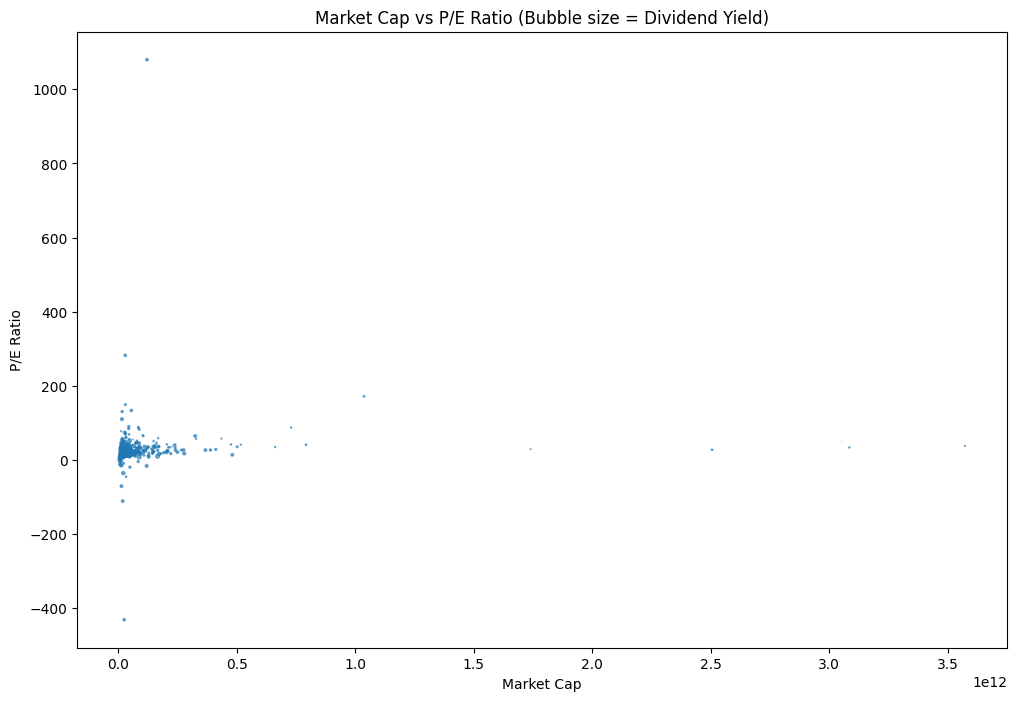

In [37]:
# Bubble chart: Market Cap vs P/E vs Dividend Yield
plt.figure(figsize=(12, 8))
plt.scatter(df['Market Cap'], df['Price/Earnings'], 
           s=df['Dividend Yield']*100, alpha=0.6)
plt.xlabel('Market Cap')
plt.ylabel('P/E Ratio')
plt.title('Market Cap vs P/E Ratio (Bubble size = Dividend Yield)')

Text(0.5, 1.0, 'Stock Price Ranges with Current Position')

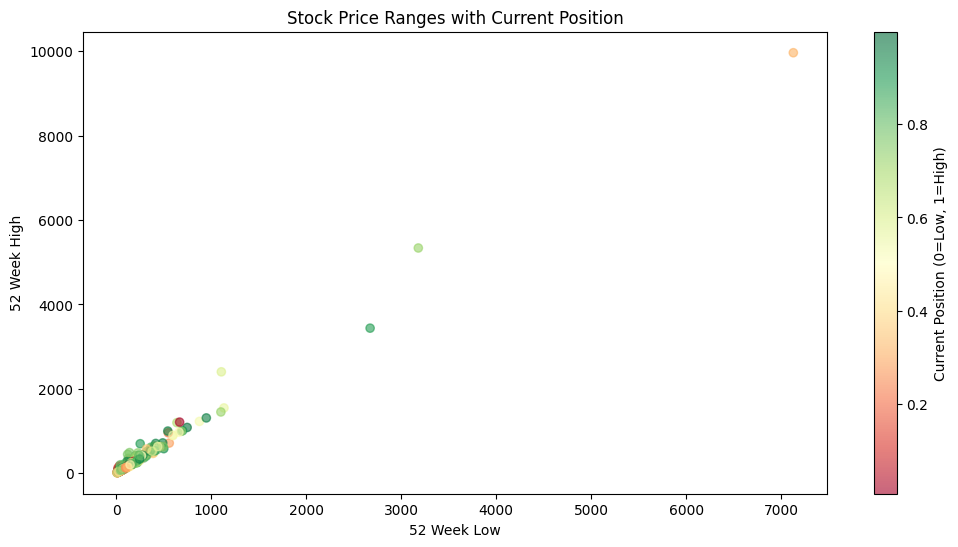

In [38]:
# 52-week performance
df['Price_Range'] = df['52 Week High'] - df['52 Week Low']
df['Current_Position'] = (df['Price'] - df['52 Week Low']) / df['Price_Range']

plt.figure(figsize=(12, 6))
plt.scatter(df['52 Week Low'], df['52 Week High'], 
           c=df['Current_Position'], cmap='RdYlGn', alpha=0.6)
plt.colorbar(label='Current Position (0=Low, 1=High)')
plt.xlabel('52 Week Low')
plt.ylabel('52 Week High')
plt.title('Stock Price Ranges with Current Position')

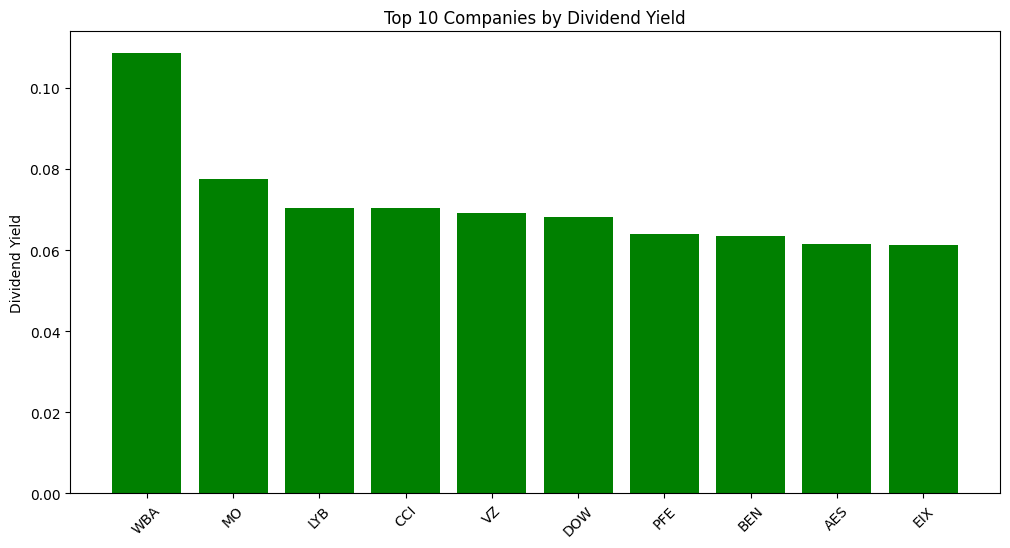

In [39]:
# Top 10 Companies by Dividend Yield
top_div_yield = df.nlargest(10, 'Dividend Yield')
plt.figure(figsize=(12, 6))
plt.bar(top_div_yield['Symbol'], top_div_yield['Dividend Yield'], color='green')
plt.xticks(rotation=45)
plt.title('Top 10 Companies by Dividend Yield')
plt.ylabel('Dividend Yield')
plt.show()

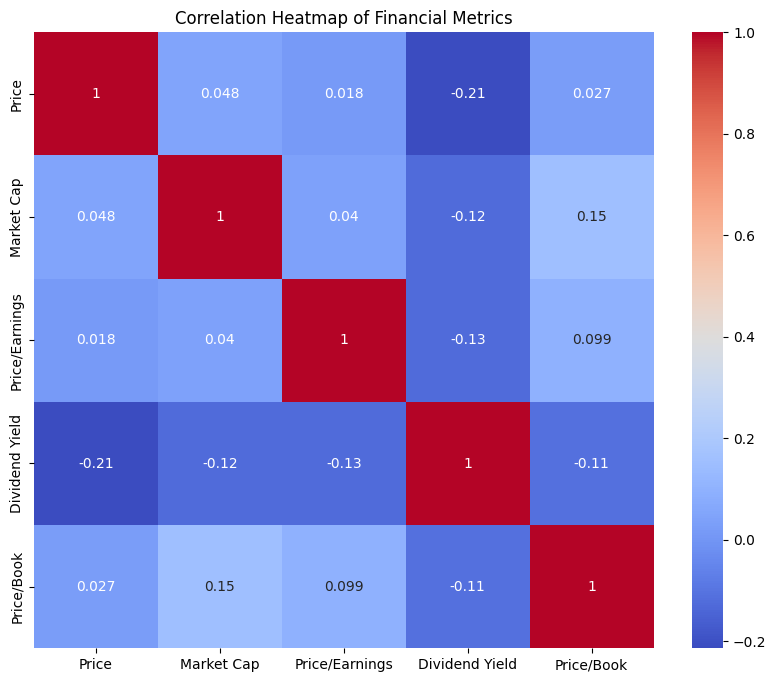

In [ ]:
#Correlation Heatmap of Key Financial Metrics
plt.figure(figsize=(10, 8))
corr = df[['Price', 'Market Cap', 'Price/Earnings', 'Dividend Yield', 'Price/Book']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()